<h4>Abalone Age Prediction</h4>

* **Rings(*Target Variable*)** used to determine age of abalone(*Rings are formed in the inner shell of the abalone. One ring will be developed per year*).Since some rings are hard to detect in this method,1.5 is traditionally added to ring count as the reasonable approximation of the age of abalone.<br>
* **Size** measurement is determined by Length,Diameter,Height.<br>
* **Weight** consists of Whole weight of abalone, Shucked_weight(*Only meat*), Viscera_weight(*gut weight*), Shell_weight(*After drying*).<br>
* **Sex** - Male,Female,Immature



<h4>Packages</h4>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"D:\Datasets\Abalone\abalone.data",names=["Sex","Length","Diameter","Height","Whole_weight","Shucked_weight","Viscera_weight","Shell_weight","Rings"])

In [3]:
df_copy = df.copy()

<h4>Basic Analysis</h4>

In [4]:
df.sample(10)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
3233,F,0.610,0.480,0.190,1.2955,0.5215,0.3225,0.3650,12
674,F,0.490,0.385,0.150,0.7865,0.2410,0.1400,0.2400,23
1888,F,0.565,0.445,0.125,0.8305,0.3135,0.1785,0.2300,11
946,F,0.470,0.365,0.120,0.5820,0.2900,0.0920,0.1460,8
1884,M,0.555,0.400,0.130,0.7075,0.3320,0.1585,0.1800,7
740,M,0.530,0.440,0.205,0.8350,0.3200,0.2175,0.2450,14
2997,F,0.625,0.490,0.110,1.1360,0.5265,0.1915,0.2925,9
1694,M,0.630,0.505,0.170,1.0915,0.4615,0.2660,0.3000,9
1691,I,0.625,0.470,0.155,1.1955,0.6430,0.2055,0.3145,12
885,F,0.670,0.585,0.160,1.3090,0.5445,0.2945,0.4130,10


In [5]:
df.shape

(4177, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [9]:
df_Object = df.select_dtypes(include = "object")
df_Object.columns

Index(['Sex'], dtype='object')

In [10]:
df_quan = df.select_dtypes(exclude="object")
df_quan

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [11]:
df_quan_columns = list(df_quan.columns)
df_quan_columns

['Length',
 'Diameter',
 'Height',
 'Whole_weight',
 'Shucked_weight',
 'Viscera_weight',
 'Shell_weight',
 'Rings']

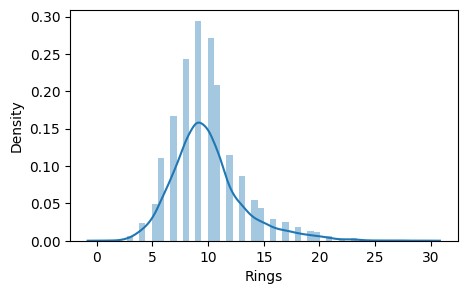

In [12]:
plt.figure(figsize=(5,3))
sns.distplot(df["Rings"]);

* Normally distributed and left skewed

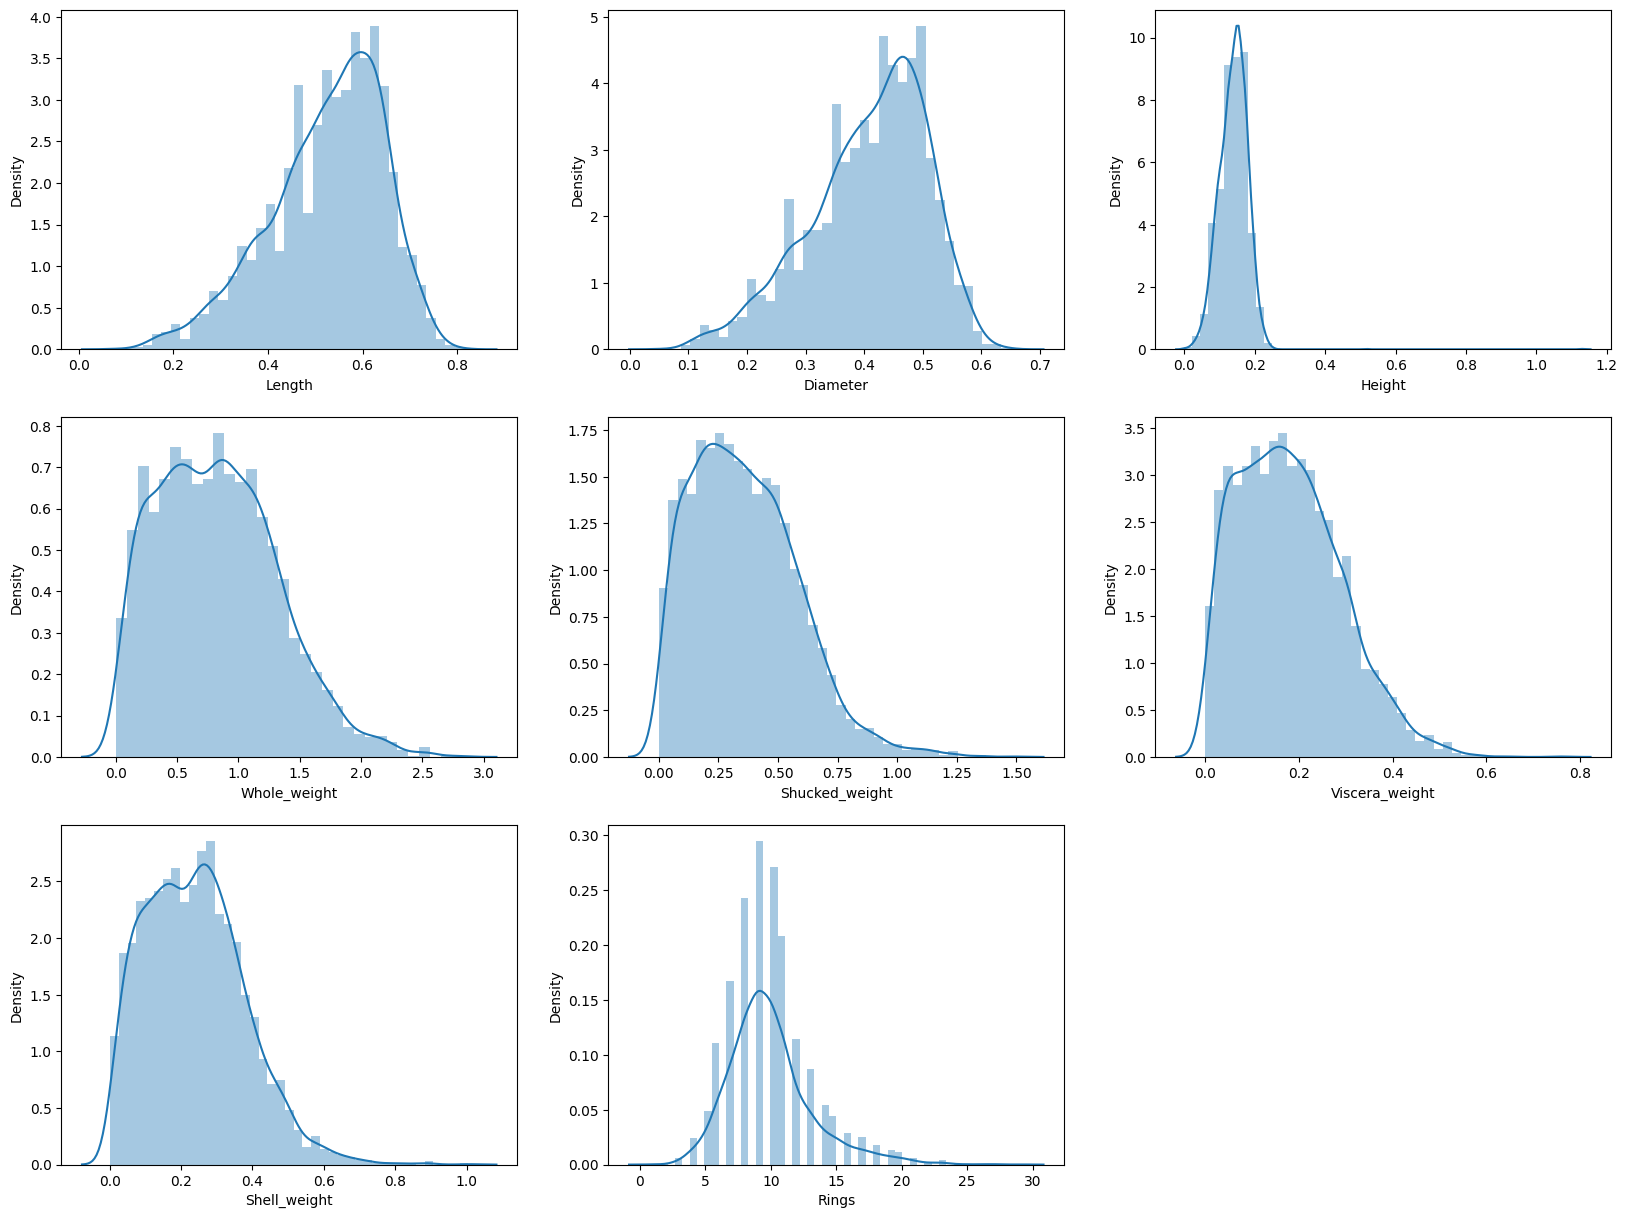

In [13]:
plt.figure(figsize=(20,15))
for j,i in enumerate(df_quan):
    plt.subplot(3,3,j+1)
    sns.distplot(df[i])

* Most of the features are normally distributed but it is skewed

In [14]:
df.Sex.value_counts(normalize=True)

M    0.365813
I    0.321283
F    0.312904
Name: Sex, dtype: float64

* Male presence is more comparative to others

In [15]:
df_Sex=df.groupby(df["Sex"]).mean().T

In [16]:
print(pd.DataFrame(df_Sex))

Sex                     F         I          M
Length           0.579093  0.427746   0.561391
Diameter         0.454732  0.326494   0.439287
Height           0.158011  0.107996   0.151381
Whole_weight     1.046532  0.431363   0.991459
Shucked_weight   0.446188  0.191035   0.432946
Viscera_weight   0.230689  0.092010   0.215545
Shell_weight     0.302010  0.128182   0.281969
Rings           11.129304  7.890462  10.705497


* Average rings Male contains aprrox 11, Female contains approx 12, Immature contains approx 8

<h4>Correlation</h4>

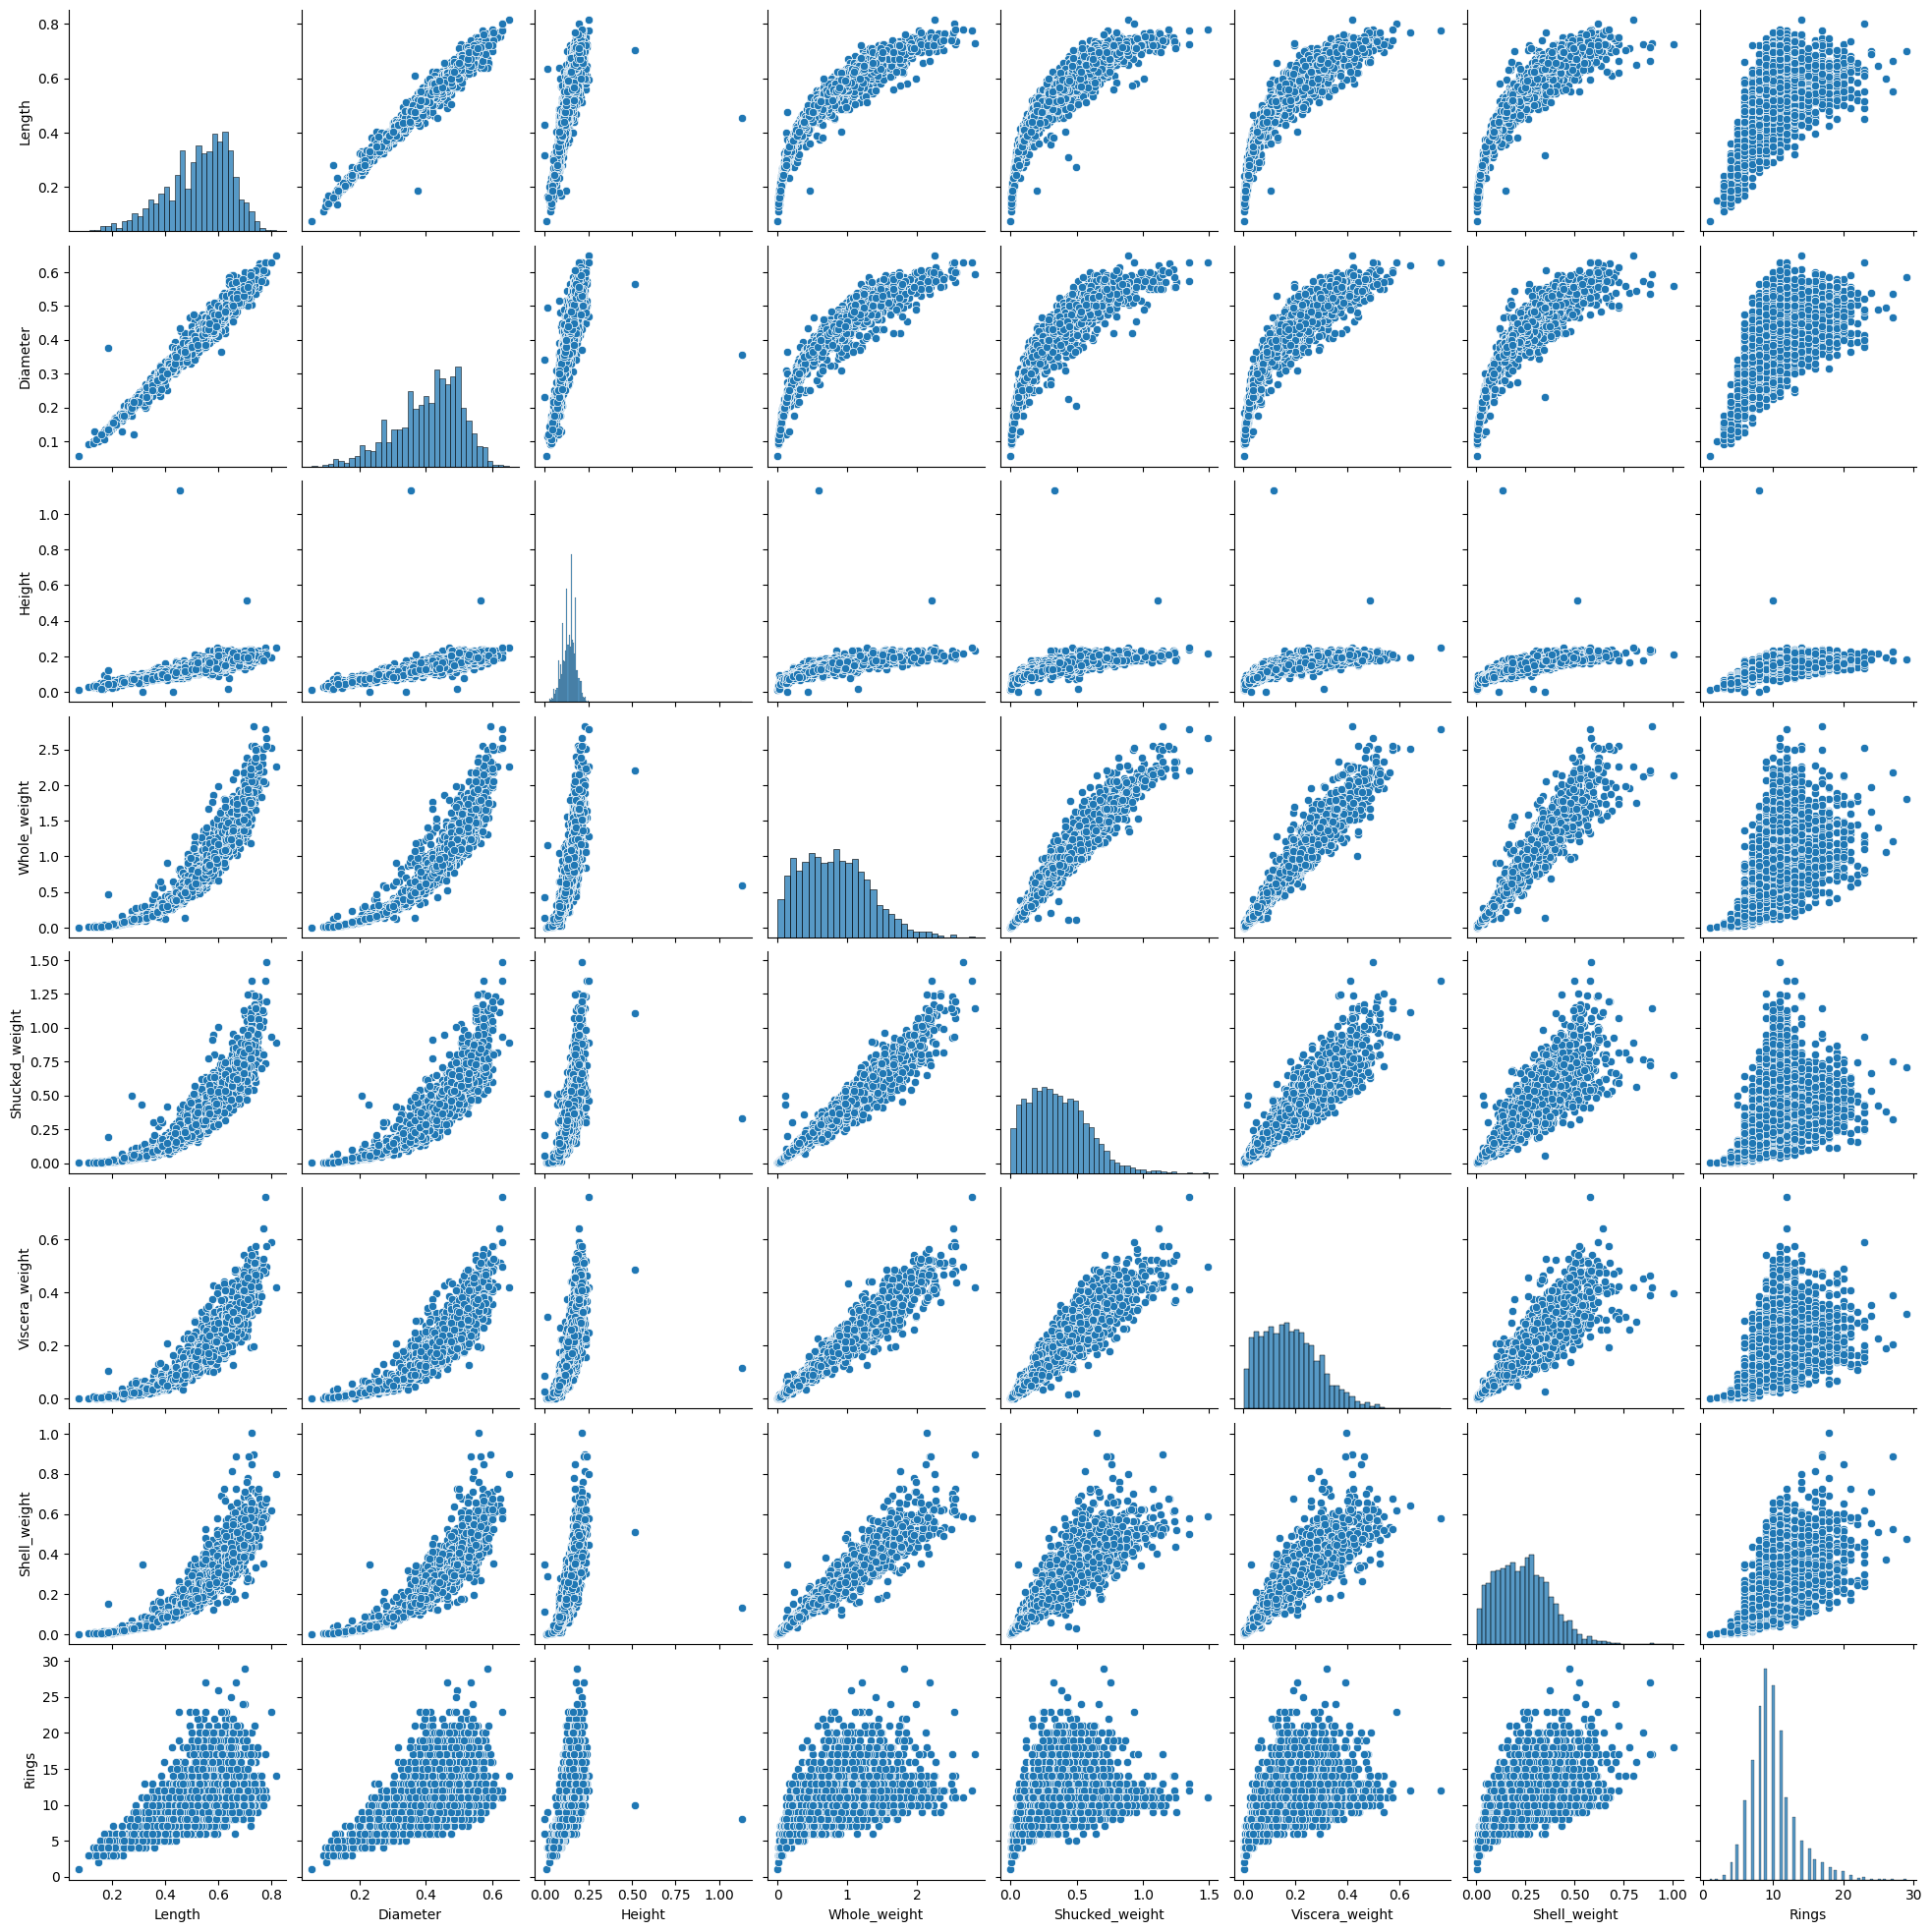

In [17]:
sns.pairplot(df,kind="scatter");

In [18]:
cor = df_quan.corr()

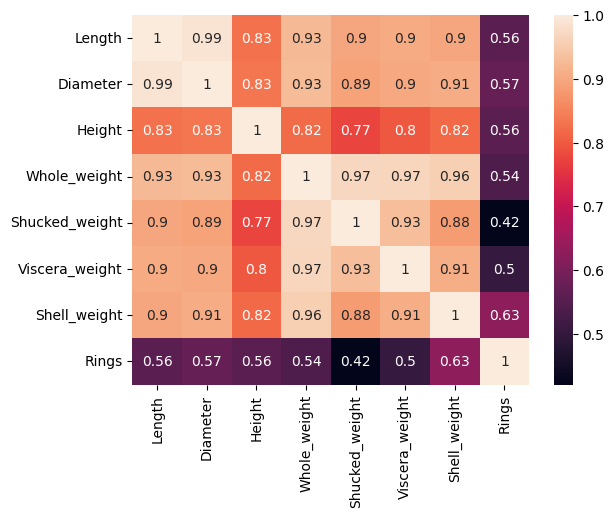

In [19]:
sns.heatmap(cor,annot =True);

*Length is highly correlated with diameter and all weights are highly correlated

<h4>Outlier Analysis & Removal</h4>

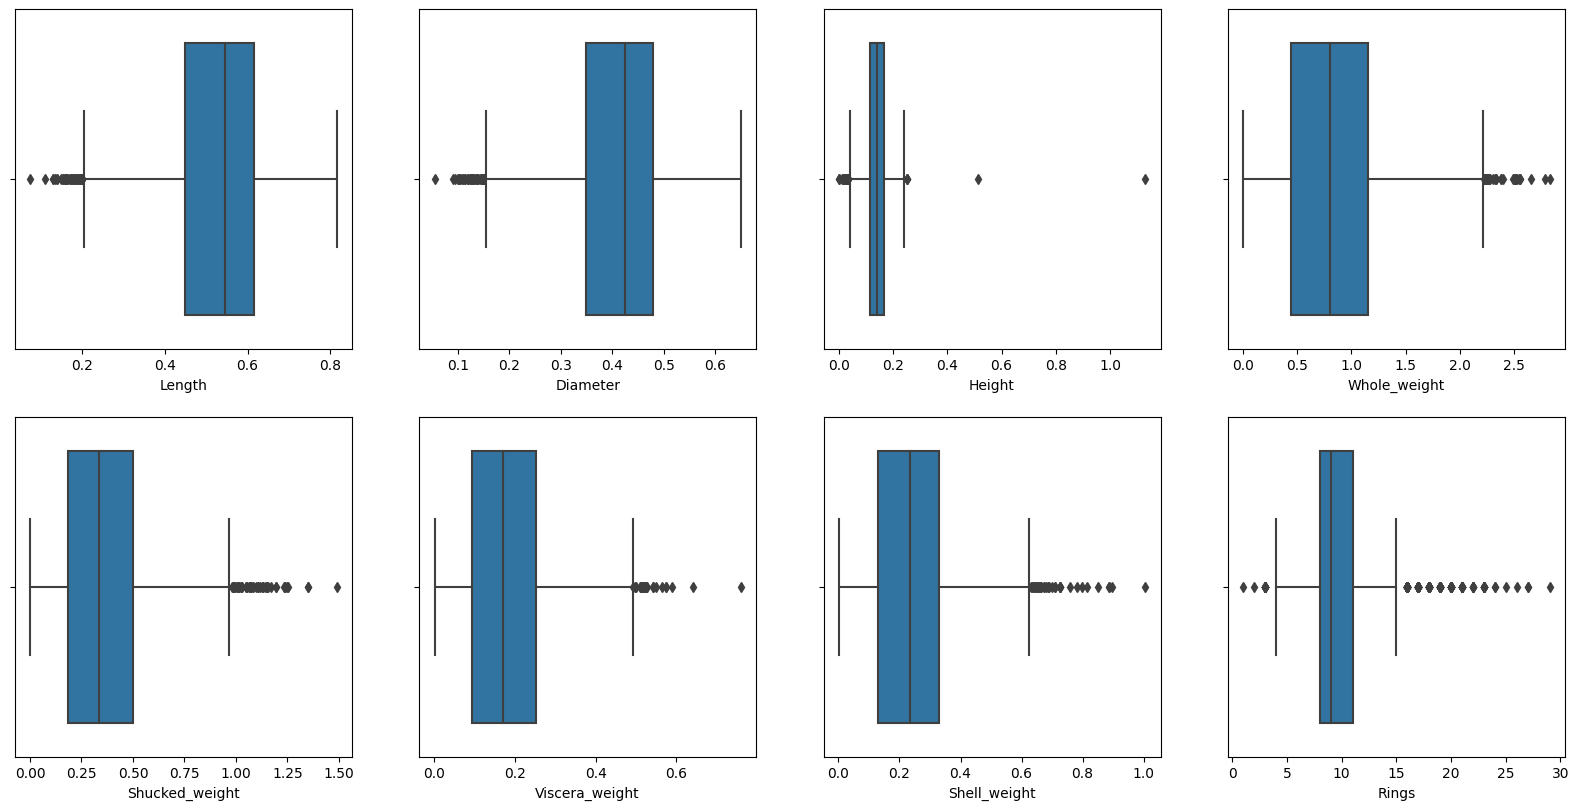

In [20]:
plt.figure(figsize=(20,15))
for j,i in enumerate(df_quan):
    plt.subplot(3,4,j+1)
    sns.boxplot(x = df[i], data = df)

In [21]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [22]:
def Outliers(df,i):
        Q1,Q2,Q3 = list(df[i].quantile([0.25,0.5,0.75]))
        IQR = Q3-Q1
        lower = Q2 - (2.5*IQR) #usually it is 1.5 for 3standard deviation but here i am considering 4standard deviation 
        upper = Q3 + (2.5*IQR)
        print("Total no of Outliers in {} {}".format(i, df[(df[i]<lower) | (df[i]>upper)].shape[0]))
        df_copy1 = df[(df[i]>lower) & (df[i]<upper)]
        return df_copy1

In [23]:
for i in df_quan:
    df_copy = Outliers(df_copy,i)

Total no of Outliers in Length 4
Total no of Outliers in Diameter 0
Total no of Outliers in Height 6
Total no of Outliers in Whole_weight 0
Total no of Outliers in Shucked_weight 3
Total no of Outliers in Viscera_weight 0
Total no of Outliers in Shell_weight 5
Total no of Outliers in Rings 92


* After removing 110 Outliers we left with 4067 records

In [24]:
df_copy.shape

(4067, 9)

<h4>Encoding</h4>

In [25]:
df_copy = pd.get_dummies(data = df_copy, columns=["Sex"])

In [26]:
df = pd.get_dummies(data = df, columns=["Sex"])

In [27]:
df_copy

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


<h4>Splitting of data and Scaling</h4>

In [28]:
X = df_copy[['Sex_F','Sex_I','Sex_M','Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight','Viscera_weight', 'Shell_weight']]
Y = df_copy["Rings"]

In [29]:
from sklearn.preprocessing import StandardScaler
Scaling = StandardScaler()

In [30]:
X_scaled = Scaling.fit_transform(X)

In [31]:
X_scaled.shape

(4067, 10)

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size=0.3,random_state=42,shuffle=True)

In [33]:
print("Shape of X-train and X-test is {} and {} ".format(x_train.shape,x_test.shape))
print("Shape of Y-train and Y-test is {} and {} ".format(y_train.shape,y_test.shape))

Shape of X-train and X-test is (2846, 10) and (1221, 10) 
Shape of Y-train and Y-test is (2846,) and (1221,) 


In [34]:
# df_copy.set_index((i for i in range(df_copy.shape[0])),inplace=True)

In [35]:
# from sklearn.model_selection import KFold
# kf = KFold(n_splits=2)

In [36]:
# for train_index, test_index in kf.split(X_scaled):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     x1_train, x1_test = X_scaled[train_index], X_scaled[test_index]
#     y1_train, y1_test = Y[train_index], Y[test_index]

In [37]:
y_train

1140     9
197     16
1927     9
2434    16
2810    10
        ..
1191    10
1357    11
920      6
3611    10
3271    17
Name: Rings, Length: 2846, dtype: int64

<h4>Model Building</h4>

In [38]:
from sklearn.metrics import mean_absolute_error,r2_score

In [39]:
def reg(y_pred):
    print('R2score on Testing data:.{}\n'.format(r2_score(y_test,y_pred)))
    print('Mean Absolute Error on Testing set :',mean_absolute_error(y_test,y_pred))
    print('Mean Standard Error on Testing set :',metrics.mean_squared_error(y_test,y_pred))
    print('Root Mean Squared Error on Testing set :',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

 **1.Linear Regression**

In [40]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train, y_train)
print("R2 score on Training data:{}\n".format(LR.score(x_train,y_train)))
y_predLR = LR.predict(x_test)
reg(y_predLR)

R2 score on Training data:0.5414662392662419

R2score on Testing data:.0.5199471219962672

Mean Absolute Error on Testing set : 1.4189388861909205


<IPython.core.display.Javascript object>

Mean Standard Error on Testing set : 3.5847841865116883


<IPython.core.display.Javascript object>

Root Mean Squared Error on Testing set : 1.1911922121097502


**2.DecisionTreeRegressor**

In [44]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)
y_predDTR = DTR.predict(x_test)
print("R2 score on Training data:{}\n".format(DTR.score(x_train,y_train)))
reg(y_predDTR)

R2 score on Training data:1.0

R2score on Testing data:.0.11360102586747534

Mean Absolute Error on Testing set : 1.8574938574938575


<IPython.core.display.Javascript object>

Mean Standard Error on Testing set : 6.619164619164619


<IPython.core.display.Javascript object>

Root Mean Squared Error on Testing set : 1.3628990635750902


**2.AdaBoost Regressor**

In [46]:
from sklearn.ensemble import AdaBoostRegressor
ABR = AdaBoostRegressor()
ABR.fit(x_train,y_train)
y_predABR = ABR.predict(x_test)
print("R2 score on Training data:{}\n".format(ABR.score(x_train,y_train)))
reg(y_predABR)

R2 score on Training data:0.42129621284985197

R2score on Testing data:.0.34901928230584234

Mean Absolute Error on Testing set : 1.845709690661411


<IPython.core.display.Javascript object>

Mean Standard Error on Testing set : 4.861184026681119


<IPython.core.display.Javascript object>

Root Mean Squared Error on Testing set : 1.3585689863460784


**3.Random Forest Regressor**

In [47]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
print("R2 score on Training data:{}\n".format(RFR.score(x_train,y_train)))
y_predRFR = RFR.predict(x_test)
reg(y_predRFR)

R2 score on Training data:0.9373240893290146

R2score on Testing data:.0.5118481193267977

Mean Absolute Error on Testing set : 1.419058149058149


<IPython.core.display.Javascript object>

Mean Standard Error on Testing set : 3.6452633087633086


<IPython.core.display.Javascript object>

Root Mean Squared Error on Testing set : 1.1912422713529558


**4.XGboost**

In [48]:
import xgboost as xgb
XGB = xgb.XGBRegressor() #overfit
XGB.fit(x_train, y_train)
print("R2 score on Training data:{}\n".format(XGB.score(x_train,y_train)))
y_predXGB = XGB.predict(x_test)
reg(y_predXGB)

R2 score on Training data:0.954425649201551

R2score on Testing data:.0.4667136068331008

Mean Absolute Error on Testing set : 1.4874781193448128


<IPython.core.display.Javascript object>

Mean Standard Error on Testing set : 3.9823042766794745


<IPython.core.display.Javascript object>

Root Mean Squared Error on Testing set : 1.2196221215379839


**5.Gradient Boosting**

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print("R2 score on Training data:{}\n".format(GBR.score(x_train,y_train)))
y_predGBR = GBR.predict(x_test)
reg(y_predGBR)

R2 score on Training data:0.666707966768918

R2score on Testing data:.0.5292075427302401

Mean Absolute Error on Testing set : 1.3912568091003163


<IPython.core.display.Javascript object>

Mean Standard Error on Testing set : 3.515632200702049


<IPython.core.display.Javascript object>

Root Mean Squared Error on Testing set : 1.179515497609216


**6.Catboost**

In [50]:
import catboost 
from catboost import CatBoostRegressor, cv, Pool
CBR = CatBoostRegressor(learning_rate=0.1)
CBR.fit(x_train,y_train)
CBR.score(x_test,y_test)

0:	learn: 2.6927584	total: 165ms	remaining: 2m 44s
1:	learn: 2.5952860	total: 168ms	remaining: 1m 23s
2:	learn: 2.5202787	total: 172ms	remaining: 57s
3:	learn: 2.4382499	total: 175ms	remaining: 43.6s
4:	learn: 2.3802125	total: 179ms	remaining: 35.5s
5:	learn: 2.3242925	total: 182ms	remaining: 30.2s
6:	learn: 2.2760492	total: 186ms	remaining: 26.3s
7:	learn: 2.2330139	total: 190ms	remaining: 23.5s
8:	learn: 2.1929902	total: 193ms	remaining: 21.3s
9:	learn: 2.1565208	total: 197ms	remaining: 19.5s
10:	learn: 2.1290276	total: 200ms	remaining: 18s
11:	learn: 2.0989284	total: 204ms	remaining: 16.8s
12:	learn: 2.0795899	total: 206ms	remaining: 15.7s
13:	learn: 2.0543200	total: 210ms	remaining: 14.8s
14:	learn: 2.0336736	total: 214ms	remaining: 14s
15:	learn: 2.0152705	total: 217ms	remaining: 13.4s
16:	learn: 2.0027831	total: 221ms	remaining: 12.8s
17:	learn: 1.9847519	total: 224ms	remaining: 12.2s
18:	learn: 1.9737563	total: 228ms	remaining: 11.8s
19:	learn: 1.9618208	total: 231ms	remaining: 

198:	learn: 1.4971143	total: 729ms	remaining: 2.93s
199:	learn: 1.4966622	total: 732ms	remaining: 2.93s
200:	learn: 1.4953655	total: 735ms	remaining: 2.92s
201:	learn: 1.4923624	total: 739ms	remaining: 2.92s
202:	learn: 1.4918128	total: 742ms	remaining: 2.91s
203:	learn: 1.4899344	total: 745ms	remaining: 2.9s
204:	learn: 1.4898492	total: 747ms	remaining: 2.9s
205:	learn: 1.4874990	total: 749ms	remaining: 2.88s
206:	learn: 1.4857716	total: 751ms	remaining: 2.88s
207:	learn: 1.4845183	total: 753ms	remaining: 2.87s
208:	learn: 1.4825899	total: 754ms	remaining: 2.85s
209:	learn: 1.4816219	total: 756ms	remaining: 2.84s
210:	learn: 1.4809915	total: 758ms	remaining: 2.83s
211:	learn: 1.4805899	total: 760ms	remaining: 2.82s
212:	learn: 1.4804563	total: 761ms	remaining: 2.81s
213:	learn: 1.4802615	total: 763ms	remaining: 2.8s
214:	learn: 1.4801312	total: 765ms	remaining: 2.79s
215:	learn: 1.4788510	total: 766ms	remaining: 2.78s
216:	learn: 1.4778025	total: 769ms	remaining: 2.77s
217:	learn: 1.4

398:	learn: 1.2758572	total: 1.33s	remaining: 2s
399:	learn: 1.2745234	total: 1.33s	remaining: 2s
400:	learn: 1.2739803	total: 1.34s	remaining: 2s
401:	learn: 1.2732755	total: 1.34s	remaining: 1.99s
402:	learn: 1.2720915	total: 1.34s	remaining: 1.99s
403:	learn: 1.2709903	total: 1.34s	remaining: 1.98s
404:	learn: 1.2695997	total: 1.35s	remaining: 1.98s
405:	learn: 1.2685746	total: 1.35s	remaining: 1.98s
406:	learn: 1.2685156	total: 1.35s	remaining: 1.97s
407:	learn: 1.2668089	total: 1.35s	remaining: 1.96s
408:	learn: 1.2662298	total: 1.36s	remaining: 1.96s
409:	learn: 1.2653173	total: 1.36s	remaining: 1.96s
410:	learn: 1.2646716	total: 1.36s	remaining: 1.95s
411:	learn: 1.2639049	total: 1.37s	remaining: 1.95s
412:	learn: 1.2637542	total: 1.37s	remaining: 1.95s
413:	learn: 1.2632740	total: 1.37s	remaining: 1.94s
414:	learn: 1.2630829	total: 1.38s	remaining: 1.94s
415:	learn: 1.2623353	total: 1.38s	remaining: 1.94s
416:	learn: 1.2618171	total: 1.38s	remaining: 1.93s
417:	learn: 1.2617833

598:	learn: 1.1166586	total: 1.92s	remaining: 1.28s
599:	learn: 1.1165131	total: 1.92s	remaining: 1.28s
600:	learn: 1.1157163	total: 1.92s	remaining: 1.28s
601:	learn: 1.1143701	total: 1.93s	remaining: 1.27s
602:	learn: 1.1121820	total: 1.93s	remaining: 1.27s
603:	learn: 1.1106961	total: 1.93s	remaining: 1.26s
604:	learn: 1.1094065	total: 1.93s	remaining: 1.26s
605:	learn: 1.1086296	total: 1.94s	remaining: 1.26s
606:	learn: 1.1086078	total: 1.94s	remaining: 1.25s
607:	learn: 1.1071827	total: 1.94s	remaining: 1.25s
608:	learn: 1.1065868	total: 1.94s	remaining: 1.25s
609:	learn: 1.1061774	total: 1.94s	remaining: 1.24s
610:	learn: 1.1053214	total: 1.95s	remaining: 1.24s
611:	learn: 1.1042261	total: 1.95s	remaining: 1.24s
612:	learn: 1.1029098	total: 1.95s	remaining: 1.23s
613:	learn: 1.1021212	total: 1.96s	remaining: 1.23s
614:	learn: 1.1011037	total: 1.96s	remaining: 1.23s
615:	learn: 1.1008070	total: 1.96s	remaining: 1.22s
616:	learn: 1.1004867	total: 1.97s	remaining: 1.22s
617:	learn: 

798:	learn: 0.9825311	total: 2.51s	remaining: 632ms
799:	learn: 0.9824805	total: 2.52s	remaining: 629ms
800:	learn: 0.9815636	total: 2.52s	remaining: 626ms
801:	learn: 0.9806369	total: 2.52s	remaining: 623ms
802:	learn: 0.9799328	total: 2.52s	remaining: 619ms
803:	learn: 0.9794232	total: 2.53s	remaining: 616ms
804:	learn: 0.9788281	total: 2.53s	remaining: 613ms
805:	learn: 0.9777364	total: 2.54s	remaining: 610ms
806:	learn: 0.9766214	total: 2.54s	remaining: 607ms
807:	learn: 0.9754220	total: 2.54s	remaining: 604ms
808:	learn: 0.9753696	total: 2.54s	remaining: 600ms
809:	learn: 0.9751852	total: 2.54s	remaining: 597ms
810:	learn: 0.9738187	total: 2.55s	remaining: 594ms
811:	learn: 0.9737771	total: 2.55s	remaining: 590ms
812:	learn: 0.9734291	total: 2.55s	remaining: 587ms
813:	learn: 0.9733382	total: 2.55s	remaining: 583ms
814:	learn: 0.9720451	total: 2.56s	remaining: 580ms
815:	learn: 0.9713162	total: 2.56s	remaining: 577ms
816:	learn: 0.9704622	total: 2.56s	remaining: 574ms
817:	learn: 

0.4981886400621708

<h4>7.Support Vector Machine</h4>

In [51]:
from sklearn.svm import SVR
svr = SVR()

In [52]:
svr.fit(x_train, y_train)
print("R2 score on Training data:{}\n".format(svr.score(x_train,y_train)))
y_predsvr = svr.predict(x_test)
reg(y_predsvr)

R2 score on Training data:0.5741887335131584

R2score on Testing data:.0.5356583330953659

Mean Absolute Error on Testing set : 1.339527887369375


<IPython.core.display.Javascript object>

Mean Standard Error on Testing set : 3.4674610671644945


<IPython.core.display.Javascript object>

Root Mean Squared Error on Testing set : 1.1573797507168402


**Hyperparamter Tuning in Random forest Regresor**

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
param = {
    "n_estimators":[65,75,85,95,105],
    "max_depth":[25,35,45,55],
    "max_features":[3,4,5],
    'min_samples_leaf': [4,5,6],
    'min_samples_split': [10,12,14],
}

In [51]:
grid_search = GridSearchCV(estimator=RFR,param_grid=param,cv=2,n_jobs=-1,)

In [52]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [25, 35, 45, 55],
                         'max_features': [3, 4, 5],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [10, 12, 14],
                         'n_estimators': [65, 75, 85, 95, 105]})

In [53]:
grid_search.best_params_

{'max_depth': 55,
 'max_features': 5,
 'min_samples_leaf': 6,
 'min_samples_split': 12,
 'n_estimators': 95}

In [54]:
hy = grid_search.best_estimator_
hy

RandomForestRegressor(max_depth=55, max_features=5, min_samples_leaf=6,
                      min_samples_split=12, n_estimators=95)

In [55]:
hp_pred = hy.predict(x_test)

In [56]:
print("R2 score on Training data:{}\n".format(hy.score(x_train,y_train)))
reg(hp_pred)

R2 score on Training data:0.7522092105681835

R2score on Testing data:.0.5398300780514231

Mean Absolute Error on Testing set : 1.3744178189965641


<IPython.core.display.Javascript object>

Mean Standard Error on Testing set : 3.4363086545160737


<IPython.core.display.Javascript object>

Root Mean Squared Error on Testing set : 1.172355670859558


<h4>Hyperparameter tuning in Gradient Boosting Regression</h4>

In [57]:
from sklearn.metrics import make_scorer,mean_squared_error

In [58]:
 param_grid1 = {
    "learning_rate": [0.1, 0.05, 0.01],
    "n_estimators": [100, 500, 1000],
    "max_depth": [3, 4, 5],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": [None, "sqrt", "log2"]
}


In [59]:
grid_search1 = GridSearchCV(estimator=GBR,param_grid=param_grid1,cv=2,n_jobs=-1, scoring=make_scorer(mean_squared_error))

In [60]:
grid_search1.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 4, 5],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000]},
             scoring=make_scorer(mean_squared_error))

In [61]:
grid_search1.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [62]:
hy1 = grid_search1.best_estimator_
hy1

GradientBoostingRegressor(learning_rate=0.01, max_features='log2',
                          min_samples_split=5)

In [63]:
hy1_pred =hy1.predict(x_test)

In [65]:
print("R2 score on Training data:{}\n".format(hy1_pred.score(x_train,y_train)))
reg(hy1_pred)

R2score on Testing data:.0.376973881449004

Mean Absolute Error on Testing set : 1.6416225683867505


<IPython.core.display.Javascript object>

Mean Standard Error on Testing set : 4.652433679499783


<IPython.core.display.Javascript object>

Root Mean Squared Error on Testing set : 1.2812581973929964


<h4>Hyperparameter tuing in XGBoost</h4>

In [53]:
param_grid2 = {
    'learning_rate': [0.05, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'reg_lambda': [0.1, 1, 10],
    'subsample': [0.5, 0.75, 1],
    'colsample_bytree': [0.5, 0.75, 1],
    'gamma': [0, 0.1, 1]
}


In [54]:
grid_search2 = GridSearchCV(estimator=XGB,param_grid=param_grid2,cv=2,n_jobs=-1,)

<IPython.core.display.Javascript object>

In [55]:
grid_search2.fit(x_train,y_train)

GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.75, 1],
                         'gamma': [0, 0.1, 1],
                         'learning_rate': [0.05, 0.1, 0.3],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'reg_lambda': [0.1, 1, 10],
                         'subsample': [0.5, 0.75, 1]})

In [56]:
grid_search2.best_params_

{'colsample_bytree': 1,
 'gamma': 1,
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 200,
 'reg_lambda': 10,
 'subsample': 0.75}

In [57]:
hy2 = grid_search2.best_estimator_
hy2

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=1, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [59]:
hy2_pred =hy2.predict(x_test)

In [62]:
print("R2 score on Training data:{}\n".format(grid_search2.score(x_train,y_train)))
reg(hy2_pred)

R2 score on Training data:0.6502689212882596

R2score on Testing data:.0.537444079851912

Mean Absolute Error on Testing set : 1.372869076443734


<IPython.core.display.Javascript object>

Mean Standard Error on Testing set : 3.4541260429884044


<IPython.core.display.Javascript object>

Root Mean Squared Error on Testing set : 1.171694958785662


Model learns on the data for so long that is why most of the algorithm overfits like decisiontree, randomforest and Xgboost which can avoid overfitting by using hyperparameter tuning